# CNN HANDWRITTEN DATA RECOGNITION

## TABLE OF CONTENTS:
1. Import libraries
2. Train the model on the MNIST data set
3. Load and pre-process handwritten data
4. Test with Real Data

### 1. Import libraries

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from numpy import unique
from numpy import reshape
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from numpy import argmax
from PIL import Image
from numpy import asarray

#!pip install opencv-python

### 2. Train the model on the MNIST data set

In [142]:
tf.random.set_seed(42)

In [143]:
hand = mnist.load_data()

In [144]:
hand[0]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [145]:
(X_train, y_train), (X_test, y_test) = hand

In [146]:
np.set_printoptions(edgeitems=3)
np.core.arrayprint._line_width = 180000

In [147]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [148]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [149]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

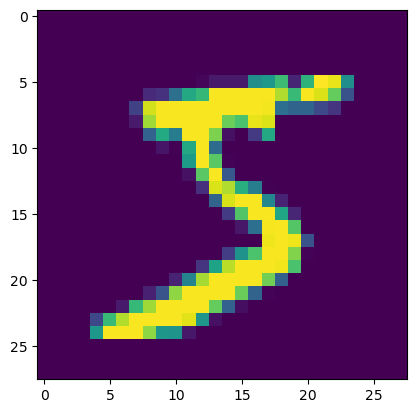

In [150]:
plt.imshow(X_train[0])

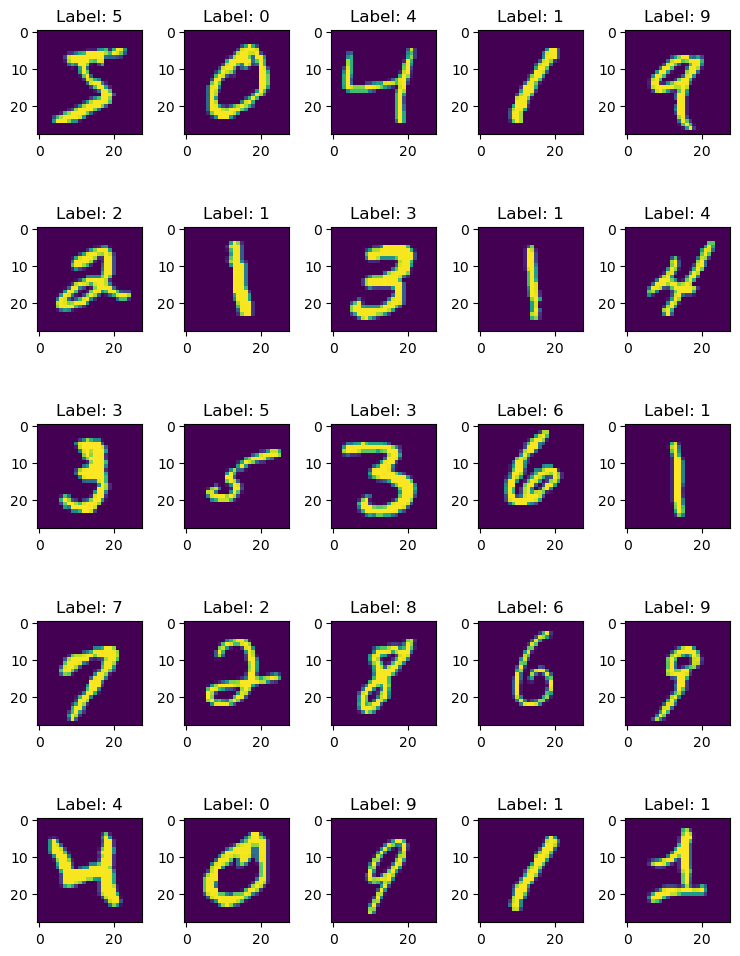

In [151]:
num = 25
images = X_train[:num]
labels = y_train[:num]

num_row = 5
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])#, cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [152]:
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [153]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [154]:
X_train /= 255
X_test /= 255

In [155]:
# 6. Preprocess class labels
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [156]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [157]:
for label in range(10):
    one_hot = (Y_train[label]).astype(np.int32)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  1  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  3  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]
label:  5  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  6  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  7  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  8  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  9  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]


In [158]:
epochs = 30
batch_size = 16
n_hidden = 32

#timesteps = len(X_train[0])
#input_dim = len(X_train[0][0])
#n_classes = _count_classes(Y_train)

# 7. Define model architecture
model = Sequential()
 
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
# 8. Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [159]:
# 9. Fit model on training data
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9366 - loss: 0.2085
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9740 - loss: 0.0864
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9801 - loss: 0.0667
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9829 - loss: 0.0557
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9850 - loss: 0.0493
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9855 - loss: 0.0444
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9882 - loss: 0.0383
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9887 - loss: 0.0355
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9901 - loss: 0.0310
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9911 - loss: 0.0283


In [160]:
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.9924 - loss: 0.0278


In [161]:
#predict first 4 images in the test set
model.predict(X_test[:4])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[8.33217755e-15, 3.27158550e-10, 2.73555123e-10, 3.07139274e-08,
        1.32519294e-13, 3.36937069e-14, 2.56853070e-20, 1.00000000e+00,
        6.16414200e-14, 9.48528145e-10],
       [1.33684245e-14, 9.40503717e-11, 1.00000000e+00, 2.96765595e-15,
        2.35832295e-18, 5.78719493e-19, 7.97279831e-13, 1.26655480e-17,
        6.25930311e-14, 2.41947486e-19],
       [6.74354626e-12, 9.99999762e-01, 1.12633458e-08, 6.07254386e-11,
        2.09281019e-08, 7.24313320e-09, 1.84644069e-08, 7.87760257e-08,
        1.17874599e-08, 9.14481213e-10],
       [9.99813020e-01, 4.76751154e-08, 4.68498520e-08, 2.07597370e-08,
        1.03164277e-08, 7.31876426e-09, 1.86115562e-04, 2.33202982e-07,
        4.84307691e-07, 1.33603324e-08]], dtype=float32)

In [162]:
sumarray = np.sum(model.predict(X_test[:4]), axis=1)
sumarray

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([1.       , 1.       , 0.9999999, 1.       ], dtype=float32)

In [163]:
#actual results for first 4 images in test set
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

In [164]:
test_predictions = model.predict(X_test)
cm = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))
print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[ 975    0    0    1    0    0    2    0    2    0]
 [   0 1130    1    1    0    1    2    0    0    0]
 [   2    0 1027    0    0    0    0    3    0    0]
 [   0    0    1 1007    0    1    0    0    1    0]
 [   0    0    1    0  978    0    0    0    0    3]
 [   1    0    0    6    0  884    1    0    0    0]
 [   3    2    0    0    2    4  945    0    2    0]
 [   0    0    6    1    0    0    0 1019    1    1]
 [   1    0    2    1    0    0    0    1  968    1]
 [   1    0    0    1    2    4    0    5    5  991]]


### 3. Loading and preprocessing handwritten data 

In [165]:
path = r'C:\Users\Administrator\Documents\data analytics\Machine Learning\ClimateWins\Pictures\digits'
path

'C:\\Users\\Administrator\\Documents\\data analytics\\Machine Learning\\ClimateWins\\Pictures\\digits'

In [166]:
img0 = Image.open(os.path.join(path, '0.png')) #<--FILL IN THIS VALUE!
print(img0.format)
print(img0.size)
print(img0.mode)

PNG
(28, 28)
L


In [167]:
# Shape into new size
newsize = (28,28)
img0 = img0.resize(newsize)
img0

# test array
testimg = asarray(img0)

print(testimg.shape)

testimg = testimg.reshape(1, 28, 28, 1)

# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

(28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
8


In [168]:
# Next image, same as above
img1 = Image.open(os.path.join(path, '1.png')) #<--FILL IN THIS VALUE!
print(img1.format)
print(img1.size)
print(img1.mode)

# Shape into new size
newsize = (28,28)
img1 = img1.resize(newsize)
img1

# test array
testimg = asarray(img1)

print(testimg.shape)

testimg = testimg.reshape(1, 28, 28, 1)

# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

PNG
(28, 28)
L
(28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
8


In [169]:
# Next image, img2, same as above
img2 = Image.open(os.path.join(path, '2.png')) #<--FILL IN THIS VALUE!
print(img2.format)
print(img2.size)
print(img2.mode)

# Shape into new size
newsize = (28,28)
img2 = img2.resize(newsize)
img3

# test array
testimg = asarray(img2)

print(testimg.shape)

testimg = testimg.reshape(1, 28, 28, 1)

# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

PNG
(28, 28)
L
(28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
8


In [170]:
# Next image, img3, same as above
img3 = Image.open(os.path.join(path, '3.png')) #<--FILL IN THIS VALUE!
print(img3.format)
print(img3.size)
print(img3.mode)

# Shape into new size
newsize = (28,28)
img3 = img3.resize(newsize)
img3

# test array
testimg = asarray(img3)

print(testimg.shape)

testimg = testimg.reshape(1, 28, 28, 1)

# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

PNG
(28, 28)
L
(28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
8


In [171]:
# Next image, img4, same as above
img4 = Image.open(os.path.join(path, '4.png')) #<--FILL IN THIS VALUE!
print(img4.format)
print(img4.size)
print(img4.mode)

# Shape into new size
newsize = (28,28)
img4 = img4.resize(newsize)
img4

# test array
testimg = asarray(img4)

print(testimg.shape)

testimg = testimg.reshape(1, 28, 28, 1)

# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

PNG
(28, 28)
L
(28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
8


In [172]:
# Next image, img5, same as above
img5 = Image.open(os.path.join(path, '5.png')) #<--FILL IN THIS VALUE!
print(img5.format)
print(img5.size)
print(img5.mode)

# Shape into new size
newsize = (28,28)
img5 = img5.resize(newsize)
img5

# test array
testimg = asarray(img5)

print(testimg.shape)

testimg = testimg.reshape(1, 28, 28, 1)

# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

PNG
(28, 28)
L
(28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
8


In [173]:
# Next image, img6, same as above
img6 = Image.open(os.path.join(path, '6.png')) #<--FILL IN THIS VALUE!
print(img6.format)
print(img6.size)
print(img6.mode)

# Shape into new size
newsize = (28,28)
img6 = img6.resize(newsize)
img6

# test array
testimg = asarray(img6)

print(testimg.shape)

testimg = testimg.reshape(1, 28, 28, 1)

# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

PNG
(28, 28)
L
(28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
8


In [174]:
# Next image, img7, same as above
img7 = Image.open(os.path.join(path, '7.png')) #<--FILL IN THIS VALUE!
print(img7.format)
print(img7.size)
print(img7.mode)

# Shape into new size
newsize = (28,28)
img7 = img7.resize(newsize)
img7

# test array
testimg = asarray(img7)

print(testimg.shape)

testimg = testimg.reshape(1, 28, 28, 1)

# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

PNG
(28, 28)
L
(28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
8


In [175]:
# Next image, img8, same as above
img8 = Image.open(os.path.join(path, '8.png')) #<--FILL IN THIS VALUE!
print(img8.format)
print(img8.size)
print(img8.mode)

# Shape into new size
newsize = (28,28)
img8 = img8.resize(newsize)
img8

# test array
testimg = asarray(img8)

print(testimg.shape)

testimg = testimg.reshape(1, 28, 28, 1)

# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

PNG
(28, 28)
L
(28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
8


In [176]:
# Next image, img9, same as above
img9 = Image.open(os.path.join(path, '9.png')) #<--FILL IN THIS VALUE!
print(img9.format)
print(img9.size)
print(img9.mode)

# Shape into new size
newsize = (28,28)
img9 = img9.resize(newsize)
img9

# test array
testimg = asarray(img9)

print(testimg.shape)

testimg = testimg.reshape(1, 28, 28, 1)

# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

PNG
(28, 28)
L
(28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2


In [177]:
img0 = img0.resize(newsize) # Redid these steps to check accuracy. 
img0

In [178]:
img1 = img1.resize(newsize)
img1

In [179]:
img2 = img2.resize(newsize)
img2

In [180]:
img3 = img3.resize(newsize)
img3

In [181]:
img4 = img4.resize(newsize)
img4


In [182]:
img5 = img5.resize(newsize)
img5

In [183]:
img6 = img6.resize(newsize)
img6

In [184]:
img7 = img7.resize(newsize)
img7

In [185]:
img8 = img8.resize(newsize)
img8

In [186]:
img9 = img9.resize(newsize)
img9

### 4. TESTING WITH REAL DATA

In [187]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2


In [188]:
labels = list(range(10))
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [189]:
path = r'C:\Users\Administrator\Documents\data analytics\Machine Learning\ClimateWins\Pictures\digits'

In [190]:
# import os 
os.path.join(path,'8.JPG')

'C:\\Users\\Administrator\\Documents\\data analytics\\Machine Learning\\ClimateWins\\Pictures\\digits\\8.JPG'

In [191]:
for label in labels:
    img_path = os.path.join(path, f'{label}.PNG')
    print(img_path)
    img = Image.open(img_path) 

C:\Users\Administrator\Documents\data analytics\Machine Learning\ClimateWins\Pictures\digits\0.PNG
C:\Users\Administrator\Documents\data analytics\Machine Learning\ClimateWins\Pictures\digits\1.PNG
C:\Users\Administrator\Documents\data analytics\Machine Learning\ClimateWins\Pictures\digits\2.PNG
C:\Users\Administrator\Documents\data analytics\Machine Learning\ClimateWins\Pictures\digits\3.PNG
C:\Users\Administrator\Documents\data analytics\Machine Learning\ClimateWins\Pictures\digits\4.PNG
C:\Users\Administrator\Documents\data analytics\Machine Learning\ClimateWins\Pictures\digits\5.PNG
C:\Users\Administrator\Documents\data analytics\Machine Learning\ClimateWins\Pictures\digits\6.PNG
C:\Users\Administrator\Documents\data analytics\Machine Learning\ClimateWins\Pictures\digits\7.PNG
C:\Users\Administrator\Documents\data analytics\Machine Learning\ClimateWins\Pictures\digits\8.PNG
C:\Users\Administrator\Documents\data analytics\Machine Learning\ClimateWins\Pictures\digits\9.PNG
